Сравнение эффективности методов KNN и SVM на плоских 
1)непересекающиеся данных
2)пересекающиеся данных
3)вложенных непересекающихся данных
4)вложенных пересекающихся данных


In [131]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sb
import time
from sklearn.svm import SVC
svm = SVC(kernel='linear')
import numpy as np

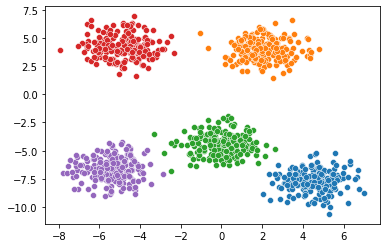

In [108]:
# Пункт 1
x1, y1 = datasets.make_blobs(n_samples=1000, center_box=(-8.0, 8.0), centers=5, random_state=10)
for i in range (0, 5):
    sb.scatterplot(x = x1[y1 == i].T[0], y = x1[y1 == i].T[1])

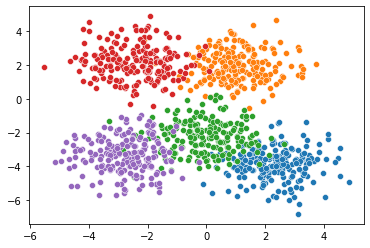

In [93]:
# Пункт 2
x2, y2 = datasets.make_blobs(n_samples=1000, centers=5, center_box=(-4.0, 4.0), random_state=10)
for i in range (0, 5):
    sb.scatterplot(x = x2[y2 == i].T[0], y = x2[y2 == i].T[1])

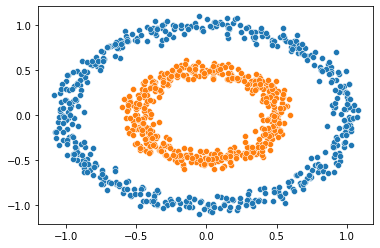

In [95]:
# Пункт 3
x3, y3 = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)
for i in range (0, 2):
    sb.scatterplot(x = x3[y3 == i].T[0], y = x3[y3 == i].T[1])

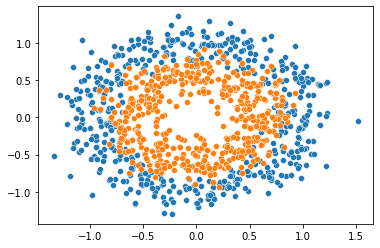

In [100]:
# Пункт 4
x4, y4 = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.15)
for i in range (0, 2):
    sb.scatterplot(x = x4[y4 == i].T[0], y = x4[y4 == i].T[1])

Перейдем к сравнению по каждому из примеров

In [170]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2)

def print_metrics(y_preds, y):
    print(f'r^2: {r2_score(y_preds, y)}')
    print(f'mse: {mse(y_preds, y)}')

In [168]:
# Пример 1 KNN
knn = KNeighborsClassifier(n_neighbors = 1)
start_time = time.time()
knn.fit(x1_train, y1_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(knn.predict(x1_test), y1_test)

Execution time: 0.0019540786743164062
r^2: 0.9888111888111888
mse: 0.02


In [130]:
# Пример 1 KNN
knn = KNeighborsClassifier(n_neighbors = 3)
start_time = time.time()
knn.fit(x1_train, y1_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(knn.predict(x1_test), y1_test)

Execution time: 0.001976490020751953
r^2: 1.0
mse: 0.0


Как видим, при переборе соседей (начиная с 1) выбор 3 является наиболее оптимальным на данном сете данных.

In [132]:
# Пример 1 SVM 
start_time = time.time()
svm.fit(x1_train, y1_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(svm.predict(x1_test), y1_test)

Execution time: 0.011968135833740234
r^2: 1.0
mse: 0.0


В данном случае SVM сохранила точность с KNN, однако время выполнения увеличилось. 

Аналогичные рассуждения проведем и для следующих случаев.

In [161]:
# Пример 2 KNN
knn = KNeighborsClassifier(n_neighbors = 12)
start_time = time.time()
knn.fit(x2_train, y2_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(knn.predict(x2_test), y2_test)

Execution time: 0.0019979476928710938
r^2: 0.9209788741958983
mse: 0.16


Как видим, при переборе соседей (начиная с 1) выбор 12 является наиболее оптимальным на данном сете данных. При увеличении соседей после 12 улучшения работы модели не происходит.

In [162]:
# Пример 2 SVM 
start_time = time.time()
svm.fit(x2_train, y2_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(svm.predict(x2_test), y2_test)

Execution time: 0.009007692337036133
r^2: 0.9236165039273847
mse: 0.15


На примере плоских пересекающихся данных SVM имеет несколько большую точность, однако и более продолжительное время работы.

In [166]:
# Пример 3 KNN
knn = KNeighborsClassifier(n_neighbors = 1)
start_time = time.time()
knn.fit(x3_train, y3_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(knn.predict(x3_test), y3_test)

Execution time: 0.001997709274291992
r^2: 1.0
mse: 0.0


Как видим, оптимальный параметр находится уже при количестве соседей равном 1.

In [171]:
# Пример 3 SVM 
start_time = time.time()
svm.fit(x3_train, y3_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(svm.predict(x3_test), y3_test)

Execution time: 0.017997026443481445
r^2: 0.0
mse: 0.57


В данном случае SVM с линейным разделителем работает крайне неэффективно, т.к. разделитель не позволяет построить границу между вложенными данными.

In [240]:
# Пример 4 KNN
knn = KNeighborsClassifier(n_neighbors = 30)
start_time = time.time()
knn.fit(x4_train, y4_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(knn.predict(x4_test), y4_test)

Execution time: 0.0010013580322265625
r^2: 0.6347402597402598
mse: 0.09


Метод KNN на вложенных пересекающихся данных справляется хуже по сравнению с предыдущими примерами, однако ещё считается применимым. При переоборе соседей оптимальным вариантом оказывается количество равное 30, при увеличении положительная тенденция далее не наблюдается.

In [241]:
# Пример 4 SVM 
start_time = time.time()
svm.fit(x4_train, y4_train)
print(f"Execution time: {time.time()-start_time}")
print_metrics(svm.predict(x4_test), y4_test)

Execution time: 0.01596689224243164
r^2: 0.0
mse: 0.53


После примера 3 очевидно, что SVM и на данном наборе данных будет работать неэффективно.

Вывод:

На представленных данных метод SVM с линейным разделителем оказываются абсолютно не применим в случае вложенных данных. На примерах с невложенными данными SVM так же не имеет явного преимущества, ибо работает дольше и, если и предоставляет большую точность по сравнению с KNN, то пренебрежительно малую.
Возможным решением проблемы с невозможностью работы SVM на вложенных данных может быть переход на нелинейные разделители или полярные координаты, при которых метод может начать работать хорошо